In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/top50spotify2019/top50.csv


In [2]:
df = pd.read_csv('/kaggle/input/top50spotify2019/top50.csv',encoding='latin1')

In [3]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
df.groupby('Genre').agg({'Artist.Name':'count'})

,Artist.Name
Genre,
atl hip hop,1
australian pop,1
big room,1
boy band,1
brostep,2
canadian hip hop,3
canadian pop,2
country rap,2
dance pop,8


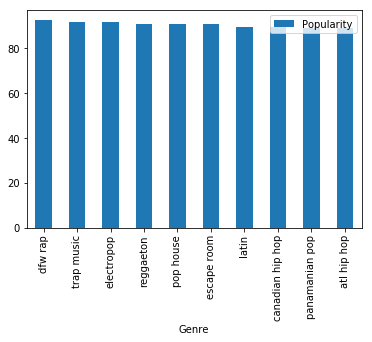

In [7]:
df.groupby('Genre').agg({'Popularity':'mean'}).sort_values(by='Popularity',ascending=False).head(10).plot.bar()

In [8]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [9]:
##Let's try predicting Popularity with Linear Regression

df = df.drop(columns=['Track.Name','Artist.Name'])
df = pd.get_dummies(df,columns=['Genre'])

In [10]:
#Using SkLearn first:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['Popularity']
X = df.drop(columns='Popularity')

X = sm.add_constant(X)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.3)

In [12]:
linreg = LinearRegression()
model1 = linreg.fit(X_train,y_train)
ypred = model1.predict(X_test)

In [13]:
ypred

array([74.00648464, 86.12871152, 85.22955751, 88.20424017, 79.31781536,
       84.30260099, 81.7805839 , 93.40920485, 70.93765662, 88.23665602,
       92.20730195, 94.76372235, 86.79302786, 80.36535348, 83.56816953])

In [14]:
y_test

47    88
7     90
2     85
9     95
5     84
26    83
13    87
37    87
0     79
19    91
20    91
18    88
16    90
40    88
44    88
Name: Popularity, dtype: int64

In [15]:
y_test-ypred

47    13.993515
7      3.871288
2     -0.229558
9      6.795760
5      4.682185
26    -1.302601
13     5.219416
37    -6.409205
0      8.062343
19     2.763344
20    -1.207302
18    -6.763722
16     3.206972
40     7.634647
44     4.431830
Name: Popularity, dtype: float64